# ROI verification

In [1]:
from prep_test_data import *
from pathlib import Path
import json
import torch
from matplotlib import pyplot as plt
import shutil
import numpy as np
import cv2
import csv

In [2]:
# TEST_DATA_PATH = Path(f'/mnt/Media/bernardo/DSL_test_data')
TEST_DATA_PATH = Path(Path.cwd().parent / r'.\data\figures_final\test')

In [3]:
roi_file_path = list((Path.cwd().parent / "ROI").glob("*.txt"))[0] # --> label final
roi_file_path

WindowsPath('C:/Users/ruiva/PycharmProjects/DSLproject/ROI/0_ROI.txt')

In [16]:
def convert_invert(x_pixel, y_pixel):
    return int((x_pixel - 375)/232.5), int((y_pixel - 227.5)/-96.389)

def roi_rectangle(img_path, roi):
    img = cv2.imread(str(img_path))
    top_left = (int(roi[4]), int(roi[3]))
    bottom_right = (int(roi[5]), int(roi[2]))
    print(f"top_left: {top_left}")    
    print(f"bottom_right: {bottom_right}")
    img = cv2.rectangle(img, top_left, bottom_right, (255,0,0), 2)
    plt.imshow(img)
#     cv2.imshow("roi-test", img)
#     plt.imshow(img)
#     cv2.waitKey()
#     cv2.destroyAllWindows()
    plt.show()
    return top_left, bottom_right, img

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\0_0_100.png ['100', '0_0', '-92981', '88', '19905', '1160', 'normal']
top_left: (-204, -1)
bottom_right: (1, 84)


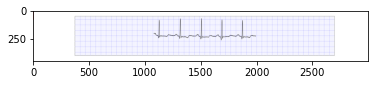

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\1_0_100.png ['100', '1_0', '-95487', '75', '16882', '1186', 'normal']
top_left: (-172, -1)
bottom_right: (1, 70)


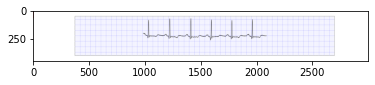

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\2_0_100.png ['100', '2_0', '-93463', '73', '16418', '1159', 'normal']
top_left: (-167, -1)
bottom_right: (1, 69)


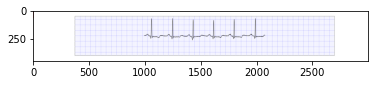

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\4_0_100.png ['100', '4_0', '-92595', '82', '16882', '1150', 'normal']
top_left: (-172, -1)
bottom_right: (1, 70)


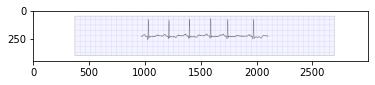

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\5_0_100.png ['100', '5_0', '-92595', '75', '16882', '1157', 'normal']
top_left: (-172, -1)
bottom_right: (1, 70)


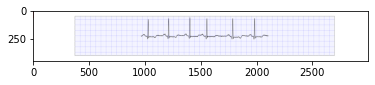

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\6_0_100.png ['100', '6_0', '-93077', '68', '15255', '1124', 'normal']
top_left: (-155, -1)
bottom_right: (1, 64)


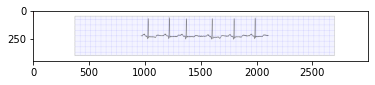

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\8_0_100.png ['100', '8_0', '-92595', '75', '16882', '1163', 'normal']
top_left: (-172, -1)
bottom_right: (1, 70)


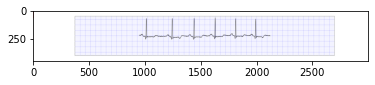

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\9_0_100.png ['100', '9_0', '-92788', '76', '17115', '1158', 'normal']
top_left: (-175, -1)
bottom_right: (1, 72)


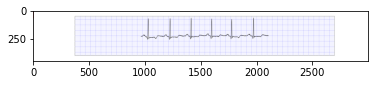

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\10_0_100.png ['100', '10_0', '-92595', '70', '15720', '1151', 'normal']
top_left: (-160, -1)
bottom_right: (1, 66)


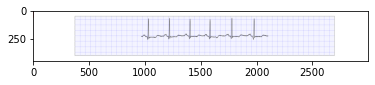

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\11_0_100.png ['100', '11_0', '-92210', '77', '17348', '1143', 'normal']
top_left: (-177, -1)
bottom_right: (1, 73)


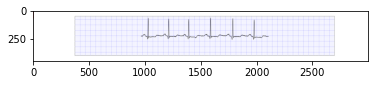

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\12_0_100.png ['100', '12_0', '-92017', '80', '18045', '1156', 'normal']
top_left: (-184, -1)
bottom_right: (1, 76)


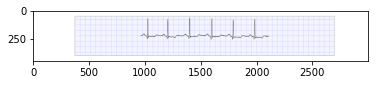

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\13_0_100.png ['100', '13_0', '-92499', '68', '15255', '1165', 'normal']
top_left: (-155, -1)
bottom_right: (1, 64)


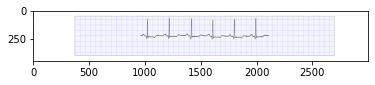

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\14_0_100.png ['100', '14_0', '-93173', '77', '17348', '1164', 'normal']
top_left: (-177, -1)
bottom_right: (1, 73)


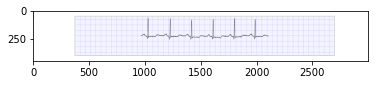

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\15_0_100.png ['100', '15_0', '-93173', '87', '16185', '1166', 'normal']
top_left: (-165, -1)
bottom_right: (1, 68)


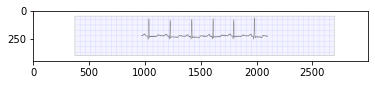

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\16_0_100.png ['100', '16_0', '-92691', '82', '18510', '1159', 'normal']
top_left: (-189, -1)
bottom_right: (1, 78)


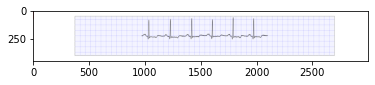

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\17_0_100.png ['100', '17_0', '-92691', '76', '17115', '1153', 'normal']
top_left: (-175, -1)
bottom_right: (1, 72)


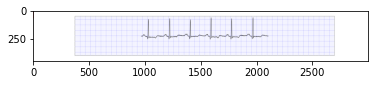

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\18_0_100.png ['100', '18_0', '-92788', '86', '18742', '1155', 'normal']
top_left: (-192, -1)
bottom_right: (1, 78)


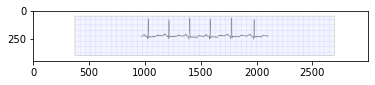

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\19_0_100.png ['100', '19_0', '-92884', '68', '15255', '1154', 'normal']
top_left: (-155, -1)
bottom_right: (1, 64)


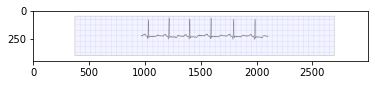

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\20_0_100.png ['100', '20_0', '-93077', '85', '19208', '1163', 'normal']
top_left: (-196, -1)
bottom_right: (1, 81)


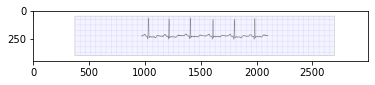

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\21_0_100.png ['100', '21_0', '-93463', '76', '17115', '1178', 'normal']
top_left: (-175, -1)
bottom_right: (1, 72)


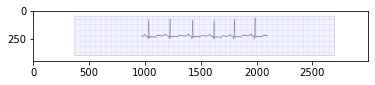

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\22_0_100.png ['100', '22_0', '-94137', '87', '19672', '1174', 'normal']
top_left: (-201, -1)
bottom_right: (1, 82)


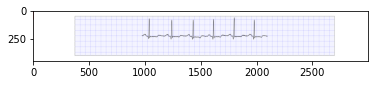

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\23_0_100.png ['100', '23_0', '-94137', '90', '16650', '1166', 'normal']
top_left: (-170, -1)
bottom_right: (1, 70)


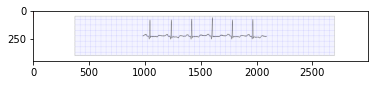

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\24_0_100.png ['100', '24_0', '-93752', '84', '18975', '1163', 'normal']
top_left: (-194, -1)
bottom_right: (1, 80)


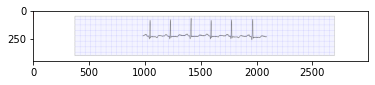

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\25_0_100.png ['100', '25_0', '-93077', '70', '15720', '1153', 'normal']
top_left: (-160, -1)
bottom_right: (1, 66)


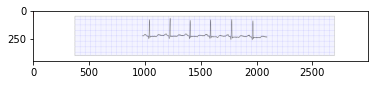

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\26_0_100.png ['100', '26_0', '-92788', '79', '17812', '1152', 'normal']
top_left: (-182, -1)
bottom_right: (1, 74)


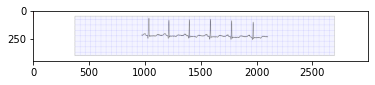

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\27_0_100.png ['100', '27_0', '-92884', '81', '18278', '1159', 'normal']
top_left: (-187, -1)
bottom_right: (1, 77)


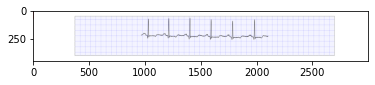

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\28_0_100.png ['100', '28_0', '-92981', '77', '17348', '1161', 'normal']
top_left: (-177, -1)
bottom_right: (1, 73)


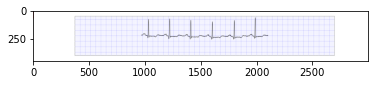

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\29_0_100.png ['100', '29_0', '-93366', '89', '20138', '1167', 'normal']
top_left: (-206, -1)
bottom_right: (1, 85)


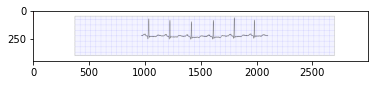

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\30_0_100.png ['100', '30_0', '-92981', '103', '21300', '1167', 'normal']
top_left: (-218, -1)
bottom_right: (1, 90)


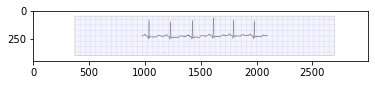

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\31_0_100.png ['100', '31_0', '-92981', '92', '20835', '1159', 'normal']
top_left: (-213, -1)
bottom_right: (1, 88)


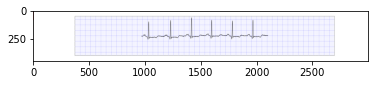

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\32_0_100.png ['100', '32_0', '-92788', '68', '15255', '1149', 'normal']
top_left: (-155, -1)
bottom_right: (1, 64)


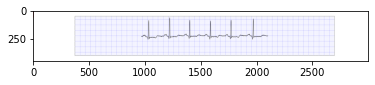

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\33_0_100.png ['100', '33_0', '-92499', '81', '18278', '1152', 'normal']
top_left: (-187, -1)
bottom_right: (1, 77)


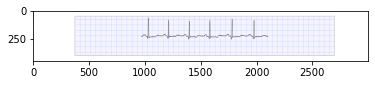

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\34_0_100.png ['100', '34_0', '-92113', '88', '19905', '1145', 'normal']
top_left: (-204, -1)
bottom_right: (1, 84)


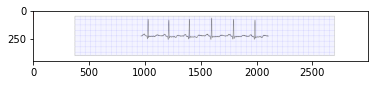

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\35_0_100.png ['100', '35_0', '-92017', '90', '20370', '1161', 'normal']
top_left: (-208, -1)
bottom_right: (1, 86)


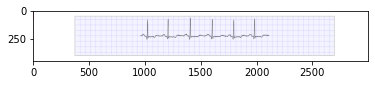

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\36_0_100.png ['100', '36_0', '-92788', '79', '17812', '1165', 'normal']
top_left: (-182, -1)
bottom_right: (1, 74)


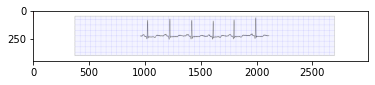

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\37_0_100.png ['100', '37_0', '-93077', '90', '20370', '1164', 'normal']
top_left: (-208, -1)
bottom_right: (1, 86)


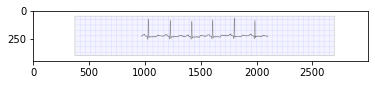

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\38_0_100.png ['100', '38_0', '-92884', '96', '21765', '1156', 'normal']
top_left: (-223, -1)
bottom_right: (1, 92)


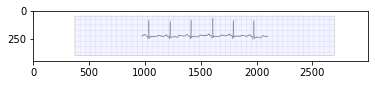

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\39_0_100.png ['100', '39_0', '-92017', '86', '19440', '1155', 'normal']
top_left: (-199, -1)
bottom_right: (1, 82)


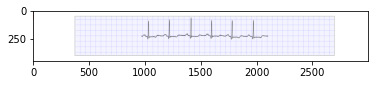

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\40_0_100.png ['100', '40_0', '-92113', '70', '15720', '1146', 'normal']
top_left: (-160, -1)
bottom_right: (1, 66)


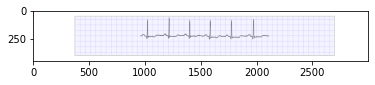

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\41_0_100.png ['100', '41_0', '-92306', '81', '18278', '1147', 'normal']
top_left: (-187, -1)
bottom_right: (1, 77)


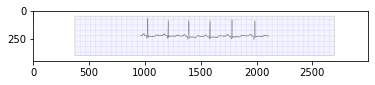

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\42_0_100.png ['100', '42_0', '-92113', '82', '18510', '1153', 'normal']
top_left: (-189, -1)
bottom_right: (1, 78)


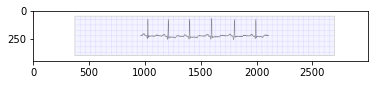

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\43_0_100.png ['100', '43_0', '-92210', '83', '18742', '1160', 'normal']
top_left: (-192, -1)
bottom_right: (1, 78)


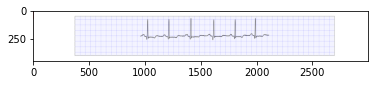

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\44_0_100.png ['100', '44_0', '-92788', '74', '16650', '1174', 'normal']
top_left: (-170, -1)
bottom_right: (1, 70)


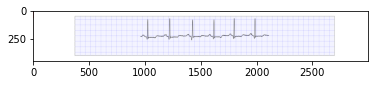

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\45_0_100.png ['100', '45_0', '-93270', '86', '19440', '1165', 'normal']
top_left: (-199, -1)
bottom_right: (1, 82)


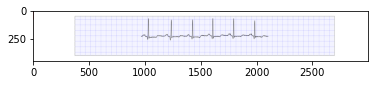

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\46_0_100.png ['100', '46_0', '-93173', '81', '18278', '1154', 'normal']
top_left: (-187, -1)
bottom_right: (1, 77)


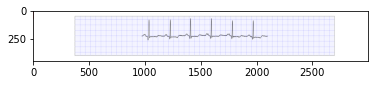

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\47_0_100.png ['100', '47_0', '-92691', '70', '15720', '1154', 'normal']
top_left: (-160, -1)
bottom_right: (1, 66)


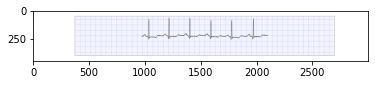

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\48_0_100.png ['100', '48_0', '-92595', '70', '15720', '1155', 'normal']
top_left: (-160, -1)
bottom_right: (1, 66)


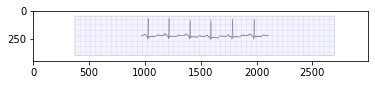

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\49_0_100.png ['100', '49_0', '-92788', '84', '18975', '1155', 'normal']
top_left: (-194, -1)
bottom_right: (1, 80)


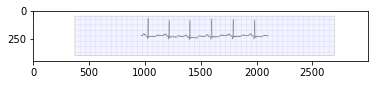

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\50_0_100.png ['100', '50_0', '-92981', '97', '21998', '1166', 'normal']
top_left: (-225, -1)
bottom_right: (1, 93)


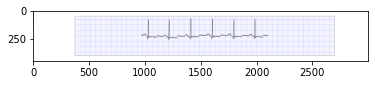

C:\Users\ruiva\PycharmProjects\DSLproject\data\figures_final\test\normal\51_0_100.png ['100', '51_0', '-93270', '84', '18975', '1167', 'normal']
top_left: (-194, -1)
bottom_right: (1, 80)


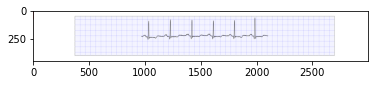

In [17]:
with open(roi_file_path) as rois:
    rois_reader = csv.reader(rois, delimiter='\t')
    j = 0
    for i, roi in enumerate(rois_reader):
        if i != 0:
            img_path = TEST_DATA_PATH / roi[6] / f"{roi[1]}_{roi[0]}.png"
            if img_path.is_file():
                print(img_path, roi)
                j += 1
                roi_rectangle(img_path, roi)
                if j == 50:
                    break